In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.datasets import mnist
from keras.layers import *
from keras.models import *
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train, _), (x_test, __) = mnist.load_data()

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

### Add some noise to the train and test image

In [ ]:
sample = GaussianNoise(0.05)
x_train_noise = sample(x_train,training = True)
x_test_noise = sample(x_test,training = True)

### Chia train và val theo tỉ lệ 4:1

In [ ]:
x_val = x_train[40000:60000,:]
x_train = x_train[:40000,:]
x_val_noise = x_train_noise[40000:60000,:]
x_train_noise = x_train_noise[:40000,:]

### Hiển thị xem giữa ảnh bị noise và ảnh gốc

Text(0.5, 1.0, 'Noise')

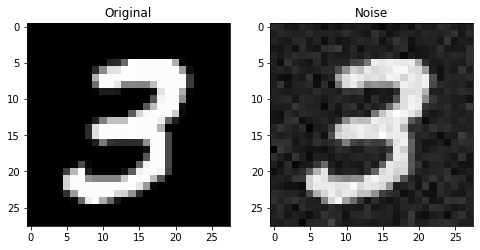

In [ ]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(x_train[7])
plt.gray()
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(x_train_noise[7])
plt.gray()
plt.title("Noise")

In [ ]:
latent_dim = 64

In [ ]:
def autoencoder(latent_dim):
  # Encoder part
  input = Input(shape=(28, 28, ))
  x = Flatten()(input)
  x = Dense(128, activation="relu")(x)
  x = Dense(latent_dim, activation="relu")(x)
  # Decoder part
  x = Dense(128, activation="relu")(x)
  x = Dense(28*28, activation="sigmoid")(x)
  output = Reshape((28, 28, 1))(x)

  model = Model(inputs=input, outputs=output)
  return model

In [ ]:
aeModel = autoencoder(latent_dim)
aeModel.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0   

In [ ]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=20, verbose=1, factor=0.1, min_lr=0.0000001), ModelCheckpoint('/content/gdrive/MyDrive/Teaching Assistant BKHN/week9/aebestmodel/denoise_{epoch:}_{val_loss:}.h5', monitor = 'val_loss',verbose = 1, save_best_only=True)]

In [ ]:
# sum((y_pred[i][j] - y[i][j])^2)
aeModel.compile(loss='mse',optimizer=Adam(lr=0.001))
steps_per_epoch = x_train.shape[0]//64
validation_steps = x_val.shape[0]//64
aeModel.fit(x_train_noise, x_train, epochs = 100, batch_size = 64, validation_data=(x_val_noise, x_val), callbacks = callbacks)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


619/625 [============================>.] - ETA: 0s - loss: 0.0078
Epoch 1: val_loss improved from 0.00834 to 0.00773, saving model to /content/gdrive/MyDrive/Teaching Assistant BKHN/week9/aebestmodel/denoise_1_0.0077339280396699905.h5
625/625 [==============================] - 3s 4ms/step - loss: 0.0078 - val_loss: 0.0077 - lr: 0.0010
Epoch 2/100
609/625 [============================>.] - ETA: 0s - loss: 0.0072
Epoch 2: val_loss improved from 0.00773 to 0.00720, saving model to /content/gdrive/MyDrive/Teaching Assistant BKHN/week9/aebestmodel/denoise_2_0.007202696055173874.h5
625/625 [==============================] - 2s 3ms/step - loss: 0.0072 - val_loss: 0.0072 - lr: 0.0010
Epoch 3/100
606/625 [============================>.] - ETA: 0s - loss: 0.0068
Epoch 3: val_loss improved from 0.00720 to 0.00698, saving model to /content/gdrive/MyDrive/Teaching Assistant BKHN/week9/aebestmodel/denoise_3_0.00698256678879261.h5
625/625 [==============================] - 2s 3ms/step - loss: 0.0068 

In [ ]:
aeModel = load_model("/content/gdrive/MyDrive/Teaching Assistant BKHN/week9/aebestmodel/denoise_100_0.004009542986750603.h5")

In [ ]:
x_predict = aeModel.predict(x_test_noise)
x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], x_predict.shape[2])

Text(0.5, 1.0, 'Denoise')

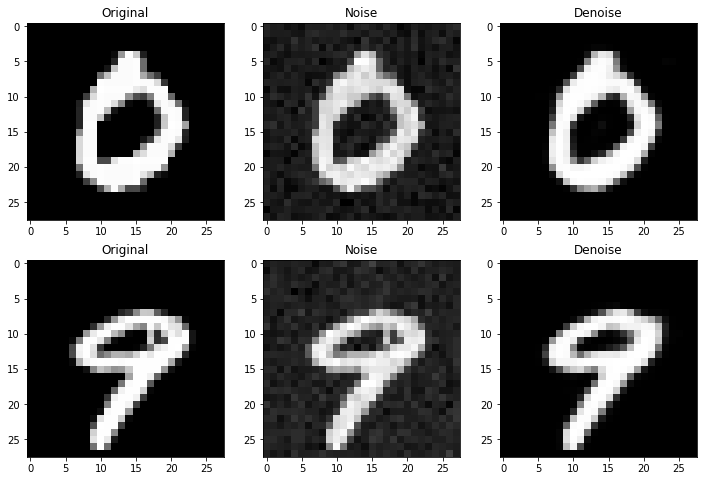

In [ ]:
fig = plt.figure(figsize = (12,8))
plt.subplot(2,3,1)
plt.imshow(x_test[3])
plt.title("Original")
plt.subplot(2,3,2)
plt.imshow(x_test_noise[3])
plt.title("Noise")
plt.subplot(2,3,3)
plt.imshow(x_predict[3])
plt.title("Denoise")
plt.subplot(2,3,4)
plt.imshow(x_test[9])
plt.title("Original")
plt.subplot(2,3,5)
plt.imshow(x_test_noise[9])
plt.title("Noise")
plt.subplot(2,3,6)
plt.imshow(x_predict[9])
plt.title("Denoise")